# Clustering

## Hierarchical clustering
Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample. 

The [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:

- __Ward__ minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
- __Maximum__ or __complete linkage__ minimizes the maximum distance between observations of pairs of clusters.
- __Average linkage__ minimizes the average of the distances between all observations of pairs of clusters.
- __Single linkage__ minimizes the distance between the closest observations of pairs of clusters.

`AgglomerativeClustering` can also scale to large number of samples when it is used jointly with a connectivity matrix, but is computationally expensive when no connectivity constraints are added between samples: it considers at each step all the possible merges.

---
**FeatureAgglomeration**

The [FeatureAgglomeration](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.FeatureAgglomeration.html#sklearn.cluster.FeatureAgglomeration) uses agglomerative clustering to group together features that look very similar, thus decreasing the number of features. It is a dimensionality reduction tool.

---

AgglomerativeClustering supports Ward, single, average, and complete linkage strategies.

Agglomerative cluster has a “rich get richer” behavior that leads to uneven cluster sizes. In this regard, single linkage is the worst strategy, and Ward gives the most regular sizes. However, the affinity (or distance used in clustering) cannot be varied with Ward, thus for non Euclidean metrics, average linkage is a good alternative. Single linkage, while not robust to noisy data, can be computed very efficiently and can therefore be useful to provide hierarchical clustering of larger datasets. Single linkage can also perform well on non-globular data.

### Example - Various Agglomerative Clustering on a 2D embedding of digits
An illustration of various linkage option for agglomerative clustering on a 2D embedding of the digits dataset.

The goal of this example is to show intuitively how the metrics behave, and not to find good clusters for the digits. This is why the example works on a 2D embedding.

What this example shows us is the behavior “rich getting richer” of agglomerative clustering that tends to create uneven cluster sizes.

This behavior is pronounced for the average linkage strategy, that ends up with a couple of clusters with few datapoints.

The case of single linkage is even more pathologic with a very large cluster covering most digits, an intermediate size (clean) cluster with most zero digits and all other clusters being drawn from noise points around the fringes.

The other linkage strategies lead to more evenly distributed clusters that are therefore likely to be less sensible to a random resampling of the dataset.

Computing embedding
Done.
ward :	0.07s
average :	0.06s
complete :	0.04s
single :	0.02s


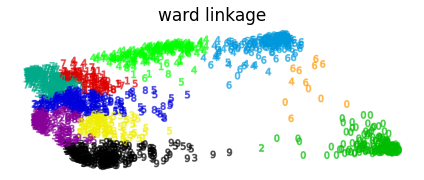

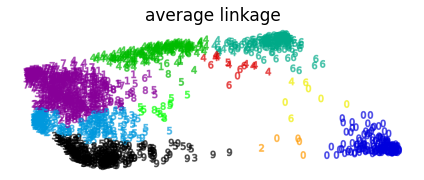

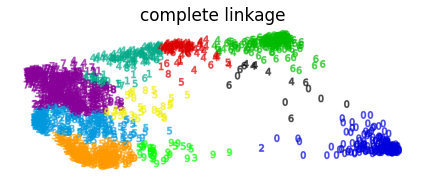

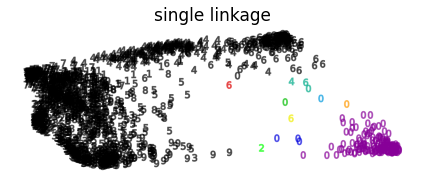

In [3]:
from time import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold, datasets
digits = datasets.load_digits()
X, y = digits.data, digits.target
n_samples, n_features = X.shape

np.random.seed(0)

#### Visualize the clustering ####

def plot_clustering(X_red, labels, title=None):
    x_min = np.min(X_red, axis=0)
    x_max = np.max(X_red, axis=0)

    # Normalize
    X_red = (X_red - x_min)/(x_max-x_min)
    
    plt.figure(figsize=(6,4))
    for digit in digits.target_names:
        plt.scatter(
            *X_red[y==digit].T,
            marker = f"${digit}$",
            s=50,
            c = plt.cm.nipy_spectral(labels[y == digit] / 10),
            alpha=0.5,
        )
        plt.xticks(())
        plt.yticks(())
        if title is not None:
            plt.title(title, size=17)
        plt.axis('off')
        plt.tight_layout(rect=[0,0.3,1,0.95])
#### Visualize the clustering ####

#### 2d embedding of the digits dataset ####

# Spectral embedding for non-linear dimensionality reduction. 
# Forms an affinity matrix given by the specified function and applies spectral decomposition to the corresponding graph laplacian. 
# The resulting transformation is given by the value of the eigenvectors for each data point.

print('Computing embedding')
X_red = manifold.SpectralEmbedding(n_components=2). fit_transform(X)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ("ward", "average", "complete", "single"):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=len(np.unique(y)))
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))
    
    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)

#### 2d embedding of the digits dataset ####
